# Data Science 3: Machine Learning with Decision Trees

In [41]:
"""
Sources:
- https://www.datacamp.com/tutorial/decision-tree-classification-python
- https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download
"""

# Load libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus

from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from io import StringIO


In [43]:
# load dataset
pima = pd.read_csv("diabetes.csv")

In [44]:
# Look at the data
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
#split dataset in features and target variable
feature_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [21]:
# Use train_test_split to split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [58]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


Accuracy: 0.771
Precision: 0.711
Recall: 0.635
[[124  22]
 [ 31  54]]


Text(0.5, 23.52222222222222, 'Predicted Label')

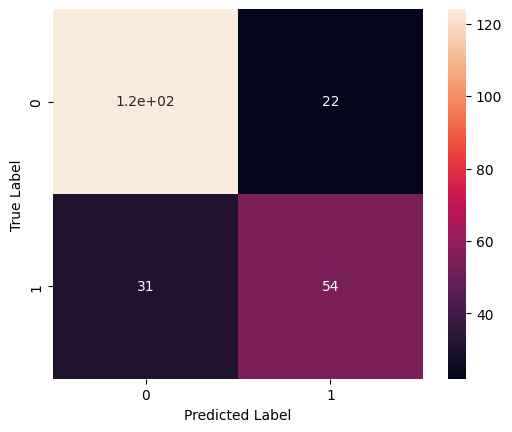

In [59]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:",metrics.precision_score(y_test, y_pred).round(3))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
print(c_matrix)

# Draw the heatmap for the confusion matrix
sns.heatmap(c_matrix.round(), annot=True, square=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

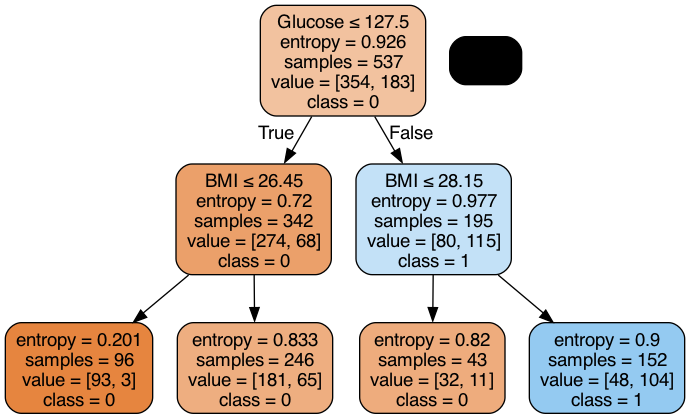

In [60]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [69]:
X_train_eval = X_train.copy()

X_train_eval["Outcome"] = y_train

X_train_eval.query("Glucose > 127.5 and BMI > 28.15 and Outcome == 1")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
642,6,147,80,0,0,29.5,0.178,50,1
730,3,130,78,23,79,28.4,0.323,34,1
31,3,158,76,36,245,31.6,0.851,28,1
388,5,144,82,26,285,32.0,0.452,58,1
...,...,...,...,...,...,...,...,...,...
215,12,151,70,40,271,41.8,0.742,38,1
580,0,151,90,46,0,42.1,0.371,21,1
357,13,129,0,30,0,39.9,0.569,44,1
715,7,187,50,33,392,33.9,0.826,34,1
